# Regression analisys

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import statsmodels.formula.api as smf
from statsmodels.stats import diagnostic as ols_d

%matplotlib inline

In [12]:
f_inp = open("./data", "r")
f_out = open("./data.csv", "w")
for line in f_inp:
    parse = str(map(lambda x: int(x), line.split())).replace('[', '').replace(']', '')
    f_out.write(parse)
    f_out.write("\n")
f_out.close()
f_inp.close()

In [13]:
data = pd.read_csv('data.csv', index_col=0, sep = ',', names = ['Age', 'Temperature', 'Length'])

In [14]:
data.head()

,Age,Temperature,Length
1,14,25,620
2,28,25,1315
3,41,25,2120
4,55,25,2600
5,69,25,3110


### Графики взаимного распределения целевой и экзогеннных переменных

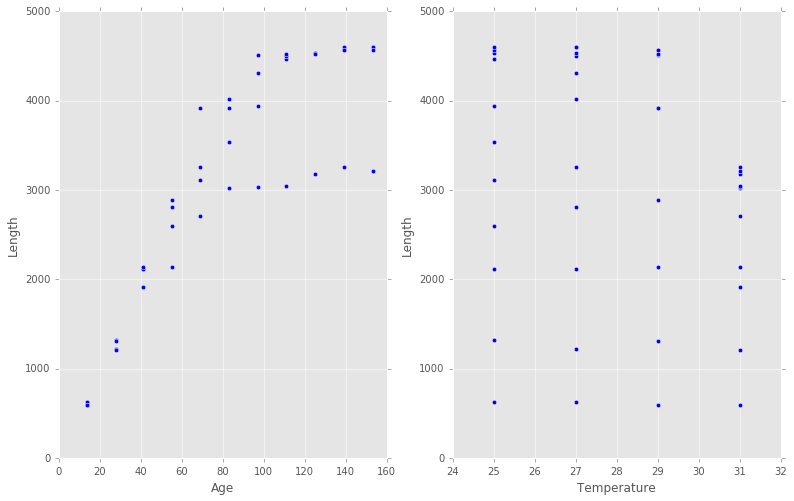

In [15]:
plt.figure(figsize = (20,8))
figure = plt.subplot(1, 3, 1)
plt.scatter(data["Age"], data["Length"])
plt.xlabel("Age")
plt.ylabel("Length")
plt.subplot(1, 3, 2)
plt.scatter(data["Temperature"], data["Length"])
plt.xlabel("Temperature")
plt.ylabel("Length")

In [25]:
lm = smf.ols(formula='Length ~ Temperature + Age', data=data).fit()
lm.params

Intercept      3904.266017
Temperature    -106.413636
Age              26.240682
dtype: float64

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Length   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     84.98
Date:                Thu, 19 May 2016   Prob (F-statistic):           2.61e-15
Time:                        23:27:16   Log-Likelihood:                -342.34
No. Observations:                  44   AIC:                             690.7
Df Residuals:                      41   BIC:                             696.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    3904.2660   1149.044      3.398      0.002      1583.724  6224.808
Temperature  -106.4136     40.452     -2.631      0.012      -188.108   -24.720
Age            26.2407      2.055     12.769      0.000        22.090    30.391
==============================================================================
Omnibus:                        0.024   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.071
Skew:                          -0.029   Prob(JB):                        0.965
Kurtosis:                       2.812   Cond. No.                     1.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Выводы:
- **1) "P > |t|" :**
При проверке гипотез о коэффициентах линейной регрессии с помощью t-test оказалось, что для коэффицентов при Temperature и Age их отклонение является незначитальным (так как обе вероятности меньше 0.05). То есть, вероятно, они довольно близки к их истинному значению.
-****
- **2) "Omnibus & Jarque-Bera" :**
Оба теста не дали основании отвергнуть гипотезу о нормальном распределении ошибок
-****
- **1) "Durbin-Watson:" :**
Остатки обладают слабой отрицательной автокорелляцией
-****
- **1) "Condition number:" :**
~300 - нехорошо, ибо матрица плохо-обусловлена


### Построение матрицы корреляции

In [27]:
data[["Temperature", "Age"]].corr()

,Temperature,Age
Temperature,1,0
Age,0,1


Можно считать, что признаки Temperature и Age линейно независимы

### QQ plot

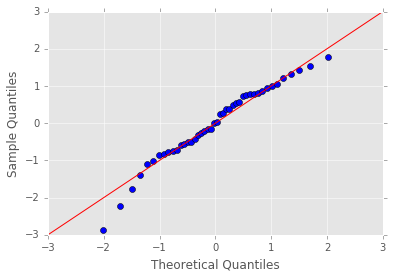

In [28]:
import statsmodels.regression.linear_model as lm
import statsmodels.graphics.gofplots as gr
from scipy import stats 
mod_fit = lm.OLS(data["Length"], data[["Temperature", "Age"]]).fit()
res = mod_fit.resid

fig = plt.figure(figsize = (30,30))
gr.qqplot(res, stats.norm, fit=True, line='45')

plt.show()

### Тестирование модели на гетероскедастичность

In [31]:
exog = data[["Temperature", "Age"]]
exog["const"] = 1

### Тест Бреуша-Пагана

In [32]:
name = ['Lagrange multiplier statistic', 'lm_pvalue',
        'f-value', 'f p-value']
test = ols_d.het_breushpagan(res, exog)
zip(name, test)

[('Lagrange multiplier statistic', 9.0175811205949792),
 ('lm_pvalue', 0.011011770197421842),
 ('f-value', 5.2843805229554563),
 ('f p-value', 0.0090811691335063744)]

P-value << 0.05, значит у нас есть основания отвергнуть гипотезу о том, что остатки гомоскедастичны.

### Тест Уайта

In [33]:
test = ols_d.het_white(res, exog)
zip(name, test)

[('Lagrange multiplier statistic', 17.320925378743006),
 ('lm_pvalue', 0.0039297023462880531),
 ('f-value', 4.9341678730326439),
 ('f p-value', 0.001410299410803)]

P-value << 0.05, значит у нас есть основания отвергнуть гипотезу о том, что остатки гомоскедастичны.

Вывод: Оба теста опровергли гипотезу о том, что остатки гомоскедастичны